In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
data = pd.read_csv(r'C:\Users\sreeh\DSA\Internship\drugtest8.csv')

In [29]:
data.head()

,Race,Gender,Age,Drug Use,Side Effects
0,African American,Male,21.0,High,Severe
1,Other,Male,46.0,High,Severe
2,Asian,Male,42.0,High,Severe
3,Caucasian,Female,31.0,Medium,Moderate
4,Caucasian,Male,36.0,Low,Moderate


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Race          400000 non-null  object 
 1   Gender        400000 non-null  object 
 2   Age           395901 non-null  float64
 3   Drug Use      400000 non-null  object 
 4   Side Effects  400000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 15.3+ MB


In [31]:
data['Age'].describe()

count    395901.000000
mean         39.691377
std          15.001845
min           0.000000
25%          29.000000
50%          40.000000
75%          50.000000
max          97.000000
Name: Age, dtype: float64

In [32]:
data_age_0 = data[data['Age'] == 0]
count = len(data_age_0)
print(count)

1721


In [33]:
print((count/data.shape[0])*100,'% of the dataset has the age 0')

0.43024999999999997 % of the dataset has the age 0


In [34]:
data.head()

,Race,Gender,Age,Drug Use,Side Effects
0,African American,Male,21.0,High,Severe
1,Other,Male,46.0,High,Severe
2,Asian,Male,42.0,High,Severe
3,Caucasian,Female,31.0,Medium,Moderate
4,Caucasian,Male,36.0,Low,Moderate


In [36]:
data.drop(data[data['Age']==0].index, axis=0, inplace=True)

In [37]:
data.describe()

,Age
count,394180.000000
mean,39.864671
std,14.803028
min,1.000000
25%,30.000000
50%,40.000000
75%,50.000000
max,97.000000


Thus we have dropped the rows where Age was zero as it brought uncertainity in the data.

Now let us see how the Age column in distributed.

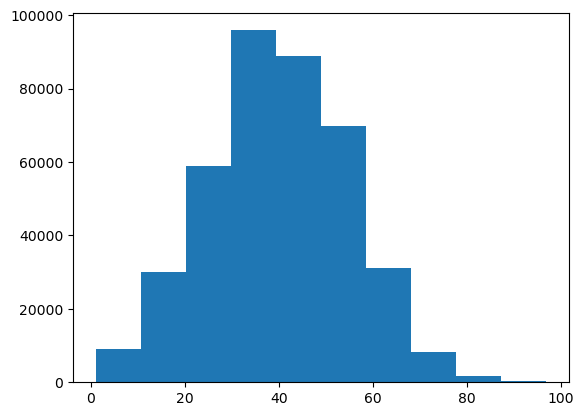

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data['Age'])
plt.show()

As the distribution is almost normal we will use mean to fill the missing values.

In [40]:
data["Age"]=data["Age"].fillna(data["Age"].mean())

In [41]:
data.isna().sum()

Race            0
Gender          0
Age             0
Drug Use        0
Side Effects    0
dtype: int64

In [42]:
data['Age'] = data['Age'].astype(int)

In [43]:
data.head()

,Race,Gender,Age,Drug Use,Side Effects
0,African American,Male,21,High,Severe
1,Other,Male,46,High,Severe
2,Asian,Male,42,High,Severe
3,Caucasian,Female,31,Medium,Moderate
4,Caucasian,Male,36,Low,Moderate


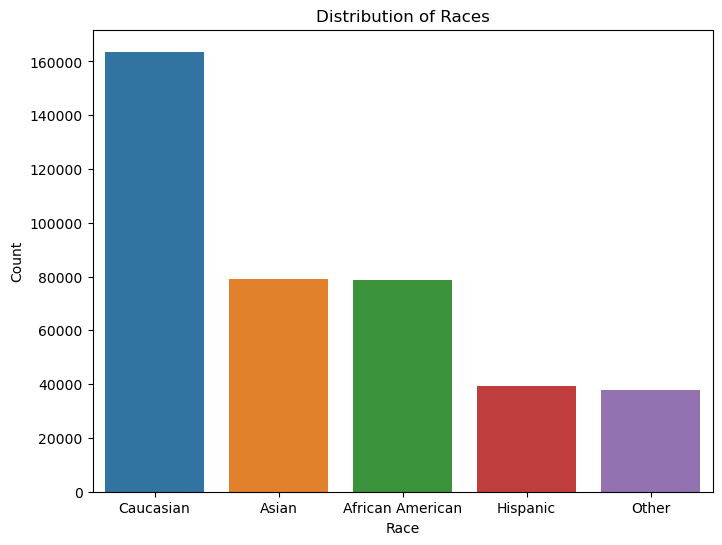

In [44]:
# Check the distribution of the races
race_counts = data['Race'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Distribution of Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

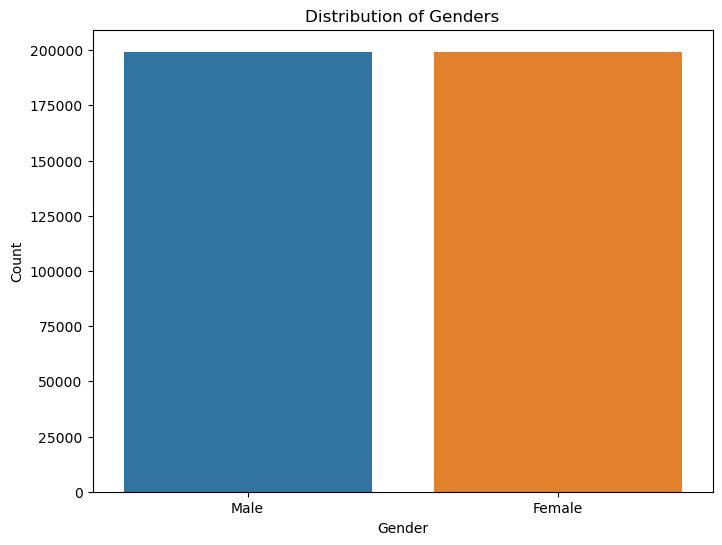

In [45]:
# Check how the gender is distributed
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

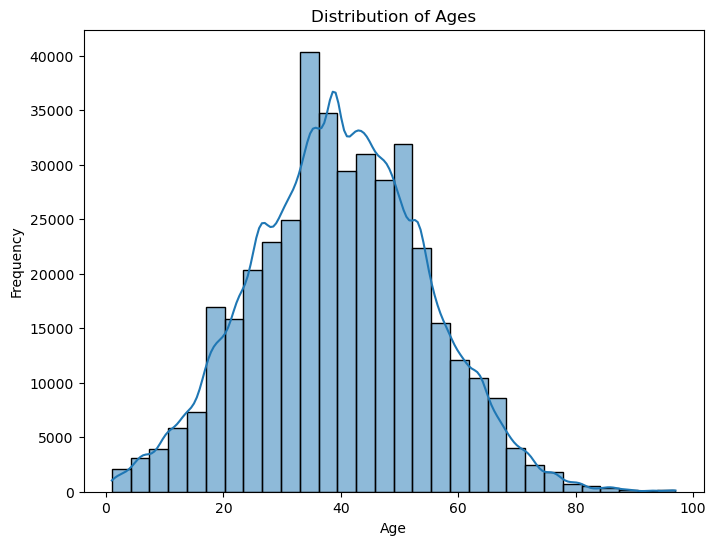

In [47]:
# Check the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

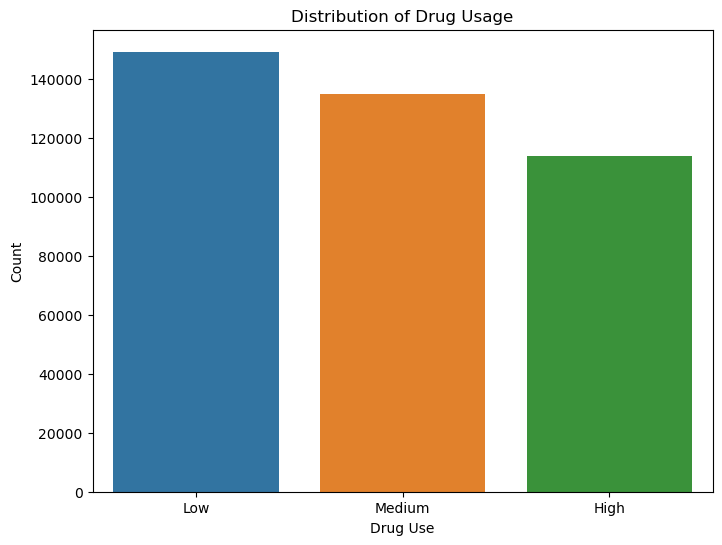

In [48]:
# How the drug usage is distributed
drug_usage_counts = data['Drug Use'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=drug_usage_counts.index, y=drug_usage_counts.values)
plt.title('Distribution of Drug Usage')
plt.xlabel('Drug Use')
plt.ylabel('Count')
plt.show()

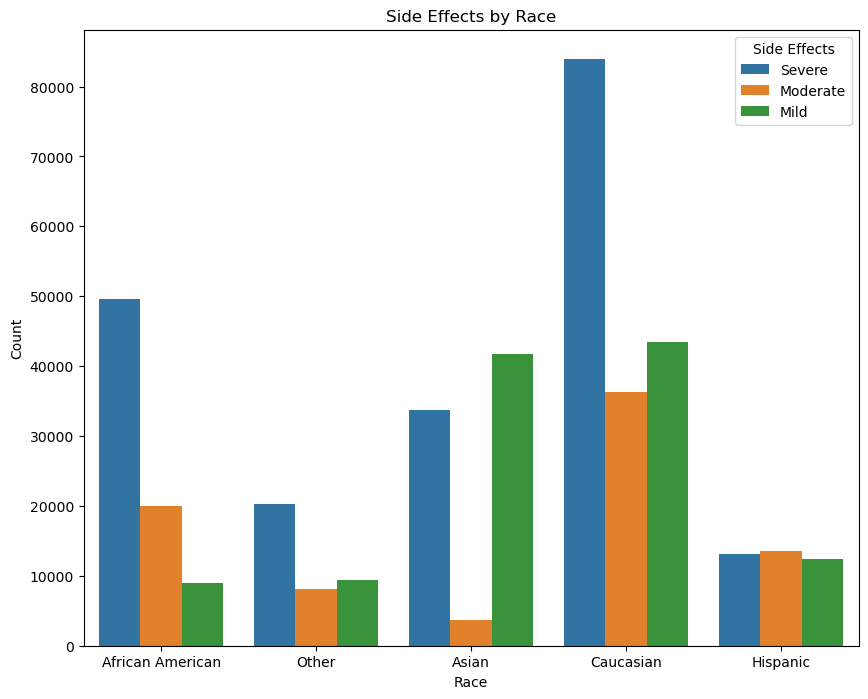

In [50]:
# Side effects by race
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Race', hue='Side Effects')
plt.title('Side Effects by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

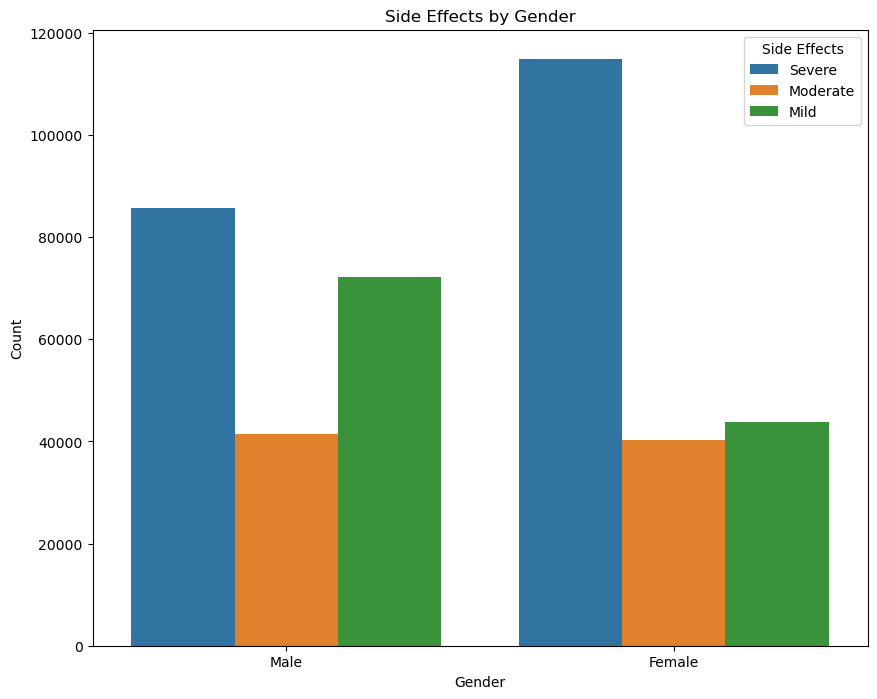

In [52]:
# Gender and how it affects side effects
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Gender', hue='Side Effects')
plt.title('Side Effects by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

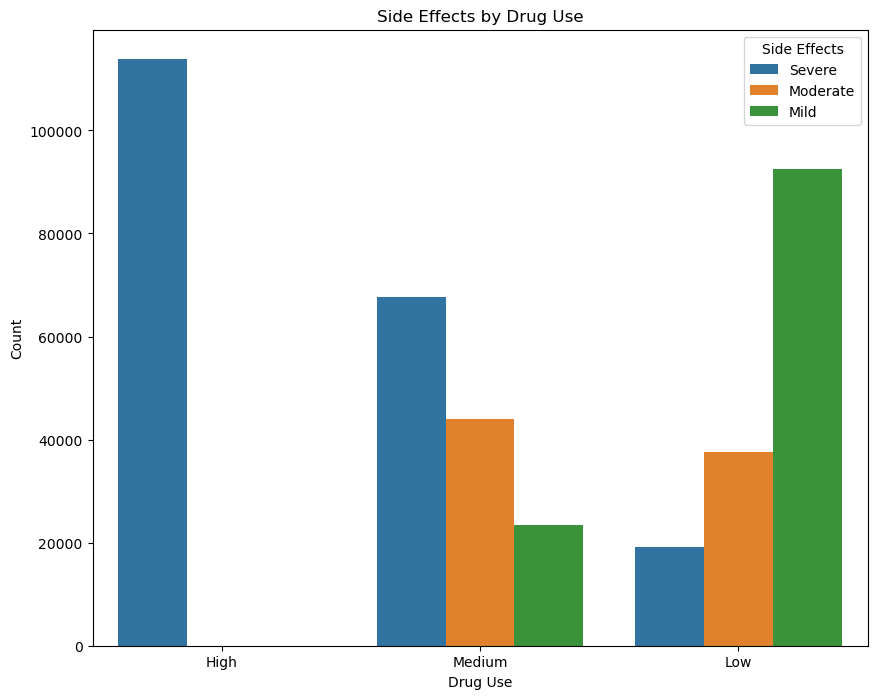

In [54]:
# Side effects when the frequency of usage is factored in
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Drug Use', hue='Side Effects')
plt.title('Side Effects by Drug Use')
plt.xlabel('Drug Use')
plt.ylabel('Count')
plt.show()

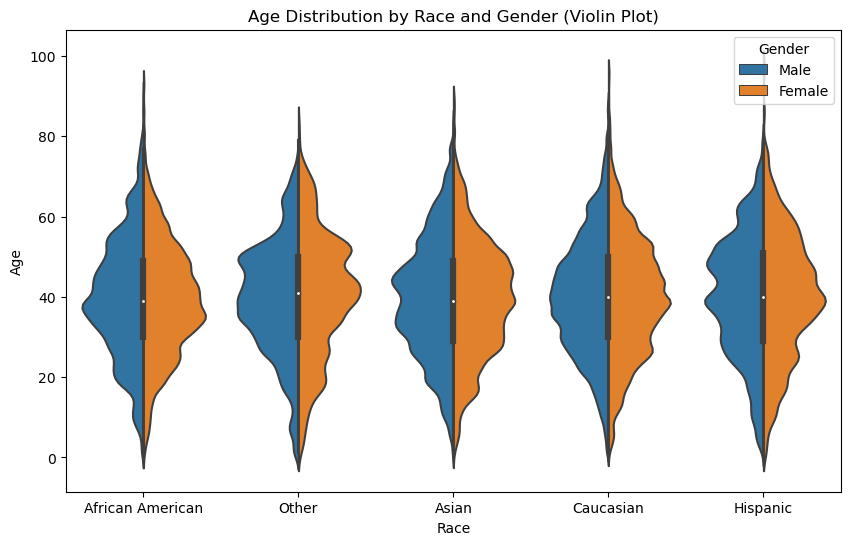

In [58]:
# Age distribution by Race and Gender
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Race', y='Age', hue='Gender', split=True)
plt.title('Age Distribution by Race and Gender (Violin Plot)')
plt.xlabel('Race')
plt.ylabel('Age')
plt.show()